In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from read_path_module import read_data_relative_path
from write_path_module import write_data_relative_path

### - Import the dataset

In [2]:
df = read_data_relative_path('./data/CDC_Natality/2003_2018.csv', data_type='csv')

### - Create pandas datetime column

In [3]:
df['DT'] = pd.to_datetime(df['Year'].astype(str) + df['Month Code'].astype(str) + '15', format='%Y%m%d')
df.sample(2)

,Notes,Year,Year Code,Month,Month Code,State,State Code,County,County Code,Births,Average Age of Mother,Average LMP Gestational Age,DT
32473,NaN,2007,2007,August,8,Wisconsin,55,"Sheboygan County, WI",55117,141.0,28.11,39.08,2007-08-15
64584,NaN,2011,2011,December,12,Colorado,8,"Mesa County, CO",8077,144.0,26.51,38.63,2011-12-15


### - Backtrack to calculate conception date
- At a high level
    - A menstrual cycle starts
    - Two weeks later ovulation occurs
    - Sparks fly and conception occurs
    - ~38 weeks later parents sleep cycles are forever changed...
    
    
- Within the dataset LMP gestational age is given. This is the estimate of the last menstrual cycle


- To calculate conception date we:
    - Take date of birth (+/- 15 days) then subtract LMP Age then add 2 weeks to ovulation

In [4]:
# Transforming the gestational age into a timedelta for time arithmetic
lst_time_intrval = [pd.Timedelta(x, unit='W') for x in df['Average LMP Gestational Age']]
    
# Date of birth - LMP Age + 2 weeks to ovulation
df['Conception Date'] = df['DT'] - pd.Series(lst_time_intrval) + pd.Timedelta(2, unit='W')
df[['DT','Conception Date']].head(2)

,DT,Conception Date
0,2003-11-05,2003-03-05
1,2003-11-05,2003-02-26


### - Clean, reorder, and create new columns

In [5]:
df['State Acronym'] = df['County'][0][-2:]
df[['County','temp']] = df['County'].str.split(',', expand=True)
df.drop(columns=['temp'], inplace=True)

df.sample(3)

df.columns.to_list()

col_lst = ['Year','Month', 'Month Code', 'DT', 'Conception Date', 'State', 'State Acronym',
           'State Code','County','County Code', 'Births','Average Age of Mother',
           'Average LMP Gestational Age','Notes']

df = df[col_lst]
del col_lst
df.head(2)

,Year,Month,Month Code,DT,Conception Date,State,State Acronym,State Code,County,County Code,Births,Average Age of Mother,Average LMP Gestational Age,Notes
0,2003,January,1,2003-11-05,2003-03-05,Alabama,AL,1,Baldwin County,1003,131.0,26.77,37.97,NaN
1,2003,January,1,2003-11-05,2003-02-26,Alabama,AL,1,Calhoun County,1015,124.0,25.32,38.63,NaN


### - Get unique list of county codes

In [28]:
lst_county_codes = list(df['County Code'].unique())

### - Births per county over time (Line)

In [19]:
def Random_County_Plotter(df, lst_county_codes):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]
    df_county.index = df_county['DT']
    df_county.head(2)

    df_county['Births'].plot(figsize=(15,6), legend=True, label='Raw')
    df_county['Births'].resample("2m").median().plot(figsize=(15,6), legend=True, label='2 Month Median Resample')
    df_county['Births'].rolling(4).median().plot(figsize=(15,6), legend=True, label='4 Month Rolling Median')

    plt.xlabel('Year')
    plt.ylabel('Births')
    plt.title(df_county['County'].to_list()[0] + ', ' + df_county['State Acronym'].to_list()[0])
    plt.show()


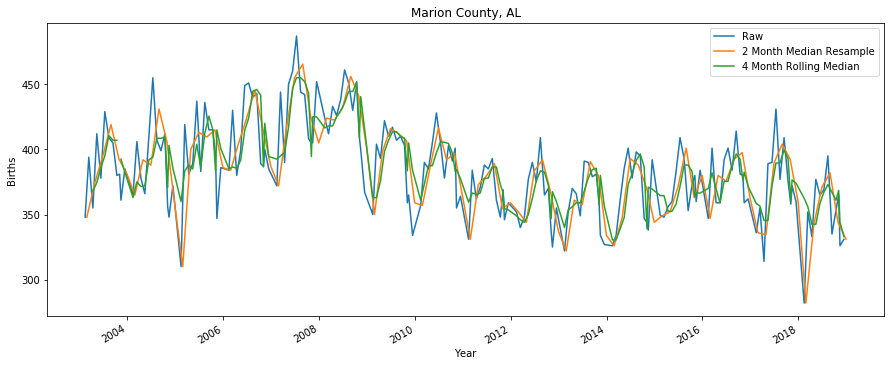

In [20]:
Random_County_Plotter(df, lst_county_codes)

### - Births per county over each year (Line)

In [17]:
def Random_County_Plotter_Annual(df, lst_county_codes):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]
    
    low = df_county['Year'].min()
    high = df_county['Year'].max()
    lst_yrs = list(range(low, high+1))
    
    plt.figure(figsize=(20,10))

    for yr in lst_yrs:
        x = df_county[df_county['Year'] == yr]['Month Code']
        y = df_county[df_county['Year'] == yr]['Births']
        plt.plot(x,y)
    
    plt.xticks(x, labels=df_county['Month'].unique(), rotation='45')
    plt.ylabel('Births')
    plt.title(df_county['County'].to_list()[0] + ', ' + df_county['State Acronym'].to_list()[0])
    plt.show()

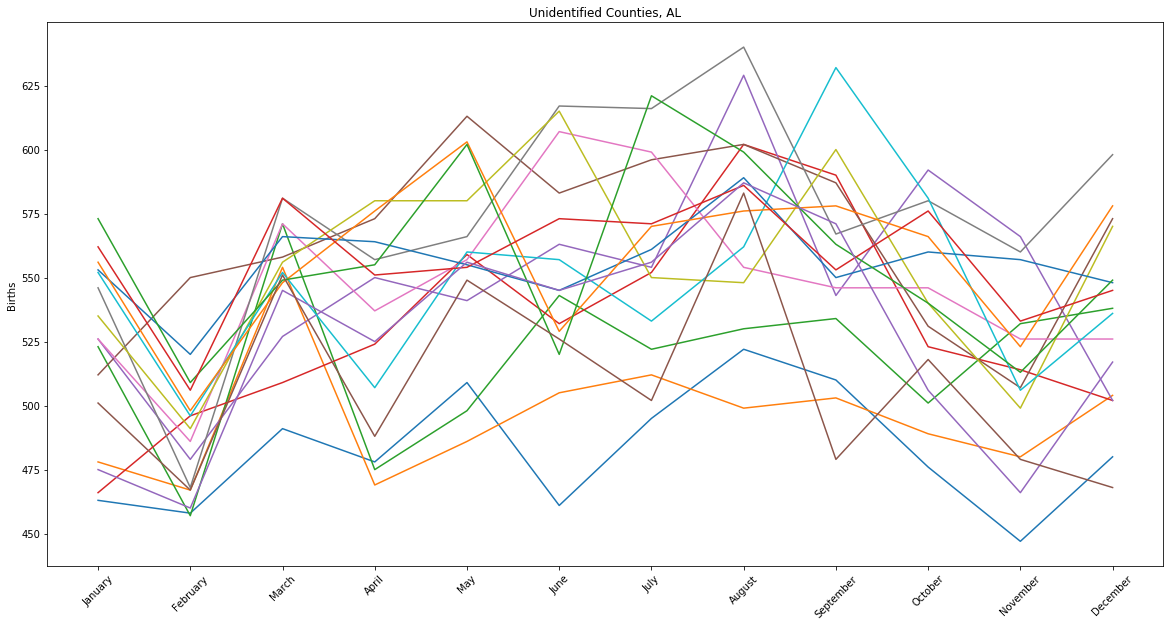

In [18]:
Random_County_Plotter_Annual(df, lst_county_codes)

### - Births per county over each year (Scatter)

In [21]:
def Random_County_Plotter_Scatter(df, lst_county_codes):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]

    
    df_county.plot(x='Month Code', y='Births', kind = 'scatter', figsize=(15,6))

    plt.xlabel('Year')
    plt.ylabel('Births')
    plt.title(df_county['County'].to_list()[0] + ', ' + df_county['State Acronym'].to_list()[0])
    plt.show()

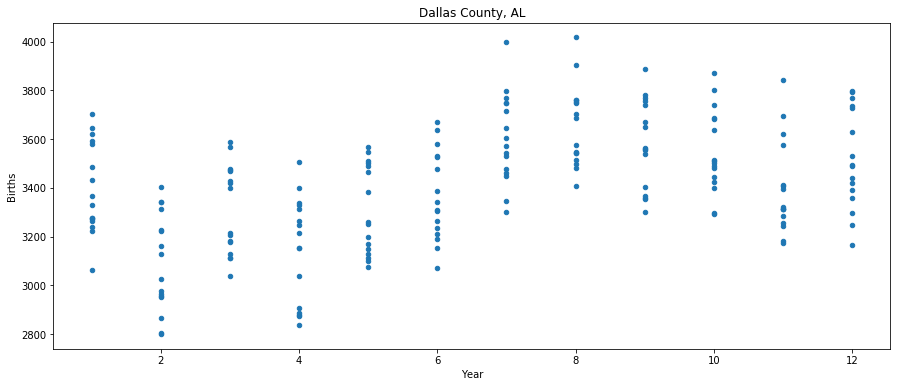

In [22]:
Random_County_Plotter_Scatter(df, lst_county_codes)

### - Births per county over each year (Boxplot)

In [26]:
def Random_County_Plotter_Boxplot(df, lst_county_codes):
    
    import random 
    n = random.randrange(0, len(lst_county_codes))
    
    df_county = df[df['County Code']==lst_county_codes[n]]

    
    df_county.boxplot(column='Births', by='Month Code', figsize=(15,6))

    plt.xlabel('Year')
    plt.ylabel('Births')
    plt.title(df_county['County'].to_list()[0] + ', ' + df_county['State Acronym'].to_list()[0])
    plt.show()

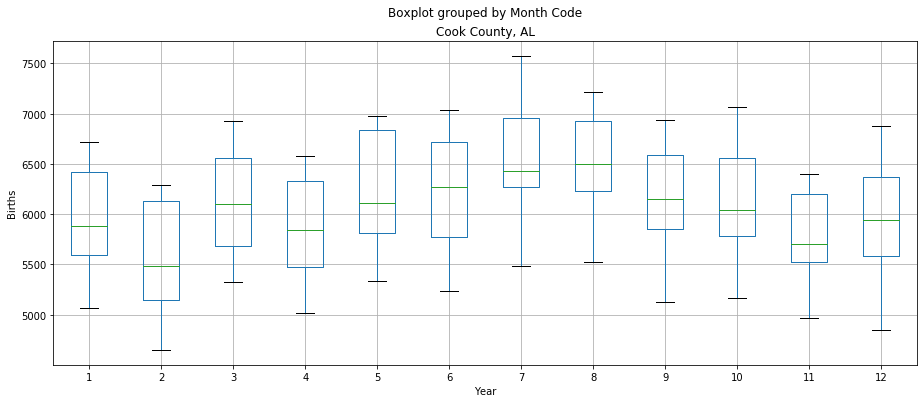

In [27]:
Random_County_Plotter_Boxplot(df, lst_county_codes)

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 

### - 